# Step size performance

The code provided in this notebook will plot statistics on the performance of MSE minimalization runs with different step sizes.

In [8]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Step 1:  Collect run samples into a folder inside this directory, then set the path to said folder as shown in the example below.

In [3]:
path = "nguyen0/"
results = {}

In [4]:
def success_rate(errors: list):
  count = 0

  for error in errors:
    if error <= 1e-15:
      count += 1

  return count / len(errors)


Step 2: Execute the following cell to gather the performance data for the collection of runs

In [5]:
for folder in os.listdir(path):
  errors = []
  iterations = []
  step_size = float(folder)
  results[step_size] = {}

  for filename in os.listdir(os.path.join(path, folder)):
    with open(os.path.join(path, folder, filename), 'r') as file:
      lines = file.readlines()
      last = lines[-1]

      if last.startswith(("target", "best")):
        last = lines[-2]

      data=last.split(" || ")
      iterations.append(int(data[1]))
      errors.append(float(data[2]))

  results[step_size]['success_rate'] = success_rate(errors)
  results[step_size]['iterations'] = iterations


Step 3: Visualize the data.

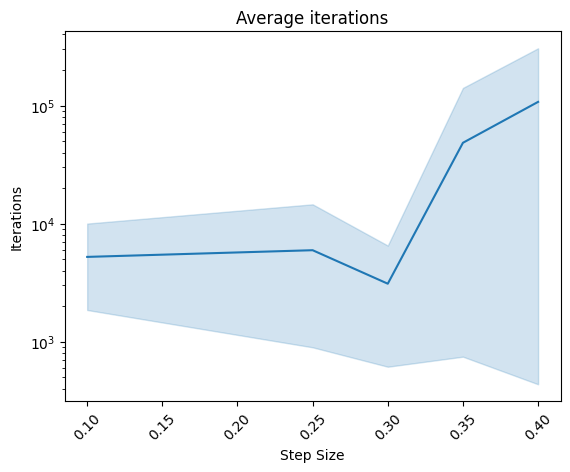

In [7]:
data = []
for step_size in results:
    for iteration in results[step_size]["iterations"]:
        data.append({'step_size': step_size, 'iterations': iteration})

df = pd.DataFrame(data)

sns.lineplot(data=df, x='step_size', y='iterations')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Average iterations')
plt.ylabel('Iterations')
plt.xlabel('Step Size')
plt.show()